<a href="https://colab.research.google.com/github/ferdiansya1805-bit/Analisis-Data-Penjualan-/blob/main/Codingan_Data_Analysis_Pertama_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Data_Mentah.csv'


In [ ]:
display(df_split.head(1000))

,Tanggal,Menu,Jumlah Terjual,Harga Satuan,Total Penjualan
0,2023-01-01,Nasi Kucing,3,5000,15000
1,2023-01-01,Teh Manis,2,3000,6000
2,2023-01-01,Sate Usus,5,3000,15000
3,2023-01-02,Gorengan,4,1500,6000
4,2023-01-02,Kopi Hitam,2,4000,8000
...,...,...,...,...,...
475,2023-03-17,Jeruk Hangat,8,3500,28000
476,2023-03-17,Nasi Kucing,9,5000,45000
477,2023-03-18,Sate Ati,6,4000,24000
478,2023-03-18,Tempe Mendoan,7,2000,14000


In [ ]:
# Define lists of food and drink items based on the unique menu items
makanan = ['Nasi Kucing', 'Sate Usus', 'Gorengan', 'Sate Ati', 'Tempe Mendoan', 'Tahu Bacem']
minuman = ['Teh Manis', 'Kopi Hitam', 'Jeruk Hangat', 'Air Mineral']

# Filter for food items
df_makanan = df_split[df_split['Menu'].isin(makanan)].copy()

# Filter for drink items
df_minuman = df_split[df_split['Menu'].isin(minuman)].copy()

# Display the first few rows of the new DataFrames (optional)
print("Data Makanan:")
display(df_makanan.head(100))

print("\nData Minuman:")
display(df_minuman.head(100))

Data Makanan:


,Tanggal,Menu,Jumlah Terjual,Harga Satuan,Total Penjualan
0,2023-01-01,Nasi Kucing,3,5000,15000
2,2023-01-01,Sate Usus,5,3000,15000
3,2023-01-02,Gorengan,4,1500,6000
5,2023-01-02,Tempe Mendoan,6,2000,12000
7,2023-01-03,Sate Ati,2,4000,8000
...,...,...,...,...,...
157,2023-01-27,Tahu Bacem,3,2500,7500
159,2023-01-27,Tempe Mendoan,2,2000,4000
160,2023-01-28,Nasi Kucing,1,5000,5000
162,2023-01-28,Sate Usus,7,3000,21000



Data Minuman:


,Tanggal,Menu,Jumlah Terjual,Harga Satuan,Total Penjualan
1,2023-01-01,Teh Manis,2,3000,6000
4,2023-01-02,Kopi Hitam,2,4000,8000
6,2023-01-02,Jeruk Hangat,3,3500,10500
8,2023-01-03,Air Mineral,5,2000,10000
11,2023-01-04,Teh Manis,3,3000,9000
...,...,...,...,...,...
236,2023-01-27,Teh Manis,4,3000,12000
237,2023-01-27,Kopi Hitam,3,4000,12000
238,2023-01-27,Air Mineral,6,2000,12000
240,2023-01-28,Jeruk Hangat,4,3500,14000


In [ ]:
# Convert 'Jumlah Terjual' to numeric, coercing errors
df_makanan['Jumlah Terjual'] = pd.to_numeric(df_makanan['Jumlah Terjual'], errors='coerce')
df_minuman['Jumlah Terjual'] = pd.to_numeric(df_minuman['Jumlah Terjual'], errors='coerce')

# Calculate total food and drink items sold
total_makanan_terjual = df_makanan['Jumlah Terjual'].sum()
total_minuman_terjual = df_minuman['Jumlah Terjual'].sum()

# Display the results
print(f"Total Makanan Terjual: {total_makanan_terjual}")
print(f"Total Minuman Terjual: {total_minuman_terjual}")

Total Makanan Terjual: 1460
Total Minuman Terjual: 984


In [ ]:
# 1. Check for duplicate transactions
print("Checking for duplicate transactions...")
duplicate_rows = df_split[df_split.duplicated()]
if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} duplicate rows.")
    display(duplicate_rows)
    # Optionally, you can remove duplicates using:
    # df_split = df_split.drop_duplicates().reset_index(drop=True)
else:
    print("No duplicate rows found.")

# 2. Handle missing values (NaN/None)
print("\nChecking for missing values...")
print(df_split.isnull().sum())
# Optionally, you can handle missing values, e.g., fill with a default value:
# df_split.fillna(value={'Jumlah Terjual': 0, 'Harga Satuan': 0, 'Total Penjualan': 0}, inplace=True)
# Or drop rows with missing values:
# df_split.dropna(inplace=True)


# 3. Check for consistency in 'Menu' format (example: show unique values)
print("\nChecking for consistency in 'Menu' format...")
print("Unique menu items:")
display(df_split['Menu'].unique())
# If inconsistencies are found (e.g., typos), you would need to manually correct them or use fuzzy matching techniques.
# Example of a simple replacement:
# df_split['Menu'] = df_split['Menu'].replace({'Indomie Gorenk': 'Indomie Goreng'})

Checking for duplicate transactions...
Found 14 duplicate rows.


,Tanggal,Menu,Jumlah Terjual,Harga Satuan,Total Penjualan
162,2023-01-28,Sate Usus,7,3000,21000
200,2023-01-21,Teh Manis,5,3000,15000
201,2023-01-21,Kopi Hitam,4,4000,16000
206,2023-01-22,Nasi Kucing,4,5000,20000
211,2023-01-23,Kopi Hitam,6,4000,24000
245,2023-01-28,Teh Manis,6,3000,18000
246,2023-01-29,Kopi Hitam,4,4000,16000
247,2023-01-29,Air Mineral,3,2000,6000
269,2023-02-02,Sate Usus,3,3000,9000
272,2023-02-02,Air Mineral,5,2000,10000



Checking for missing values...
Tanggal            0
Menu               0
Jumlah Terjual     0
Harga Satuan       0
Total Penjualan    0
dtype: int64

Checking for consistency in 'Menu' format...
Unique menu items:


array(['Nasi Kucing', 'Teh Manis', 'Sate Usus', 'Gorengan', 'Kopi Hitam',
       'Tempe Mendoan', 'Jeruk Hangat', 'Sate Ati', 'Air Mineral',
       'Tahu Bacem'], dtype=object)

# Task
Analyze the provided sales data to identify key metrics including overall sales, sales trends over different time periods (daily, weekly, monthly), best-selling and least-selling products, and average transaction value. If location data is available, also analyze sales performance by location. Present the results in a clear and organized manner.

## Total penjualan keseluruhan

### Subtask:
Hitung total penjualan dari seluruh data.


**Reasoning**:
Calculate the total sales from the 'Total Penjualan' column in the `df_split` DataFrame and print the result.



In [ ]:
total_sales = df_split['Total Penjualan'].sum()
print(f"Total Penjualan dari seluruh data: {total_sales}")

Total Penjualan dari seluruh data: 7416500


## Penjualan per hari

### Subtask:
Kelompokkan data berdasarkan tanggal dan hitung total penjualan harian.


**Reasoning**:
Convert 'Tanggal' to datetime, group by date, calculate daily total sales, and display the result.



In [ ]:
import pandas as pd

# 1. Convert the 'Tanggal' column in df_split to datetime objects.
df_split['Tanggal'] = pd.to_datetime(df_split['Tanggal'])

# 2. Group the df_split DataFrame by the 'Tanggal' column.
# 3. Calculate the sum of the 'Total Penjualan' for each date.
daily_sales = df_split.groupby('Tanggal')['Total Penjualan'].sum().reset_index()

# 4. Store the result in a new DataFrame named daily_sales. (Already done in the previous step)

# 5. Display the daily_sales DataFrame.
display(daily_sales)

,Tanggal,Total Penjualan
0,2023-01-01,36000
1,2023-01-02,36500
2,2023-01-03,28000
3,2023-01-04,62000
4,2023-01-05,50000
...,...,...
70,2023-03-14,103500
71,2023-03-15,133000
72,2023-03-16,118000
73,2023-03-17,93000


## Penjualan per minggu

### Subtask:
Konversi kolom tanggal ke format datetime, ekstrak minggu, dan hitung total penjualan mingguan.


**Reasoning**:
Convert the 'Tanggal' column to datetime, extract the week number, group by week, calculate the sum of 'Total Penjualan', and display the result.



In [ ]:
# Convert 'Tanggal' to datetime if not already
df_split['Tanggal'] = pd.to_datetime(df_split['Tanggal'])

# Extract week number
df_split['Week'] = df_split['Tanggal'].dt.isocalendar().week

# Group by week and sum total sales
weekly_sales = df_split.groupby('Week')['Total Penjualan'].sum().reset_index()

# Display the weekly_sales DataFrame
display(weekly_sales)

,Week,Total Penjualan
0,1,338500
1,2,408000
2,3,965500
3,4,1200000
4,5,827500
5,6,266500
6,7,378500
7,8,701000
8,9,822500
9,10,842500


## Penjualan per bulan

### Subtask:
Konversi kolom tanggal ke format datetime, ekstrak bulan, dan hitung total penjualan bulanan.


**Reasoning**:
Convert the 'Tanggal' column to datetime, extract the month, group by month, calculate the sum of 'Total Penjualan' for each month, store the result in `monthly_sales`, and display the `monthly_sales` DataFrame.



In [ ]:
# Convert 'Tanggal' to datetime if not already
df_split['Tanggal'] = pd.to_datetime(df_split['Tanggal'])

# Extract month
df_split['Month'] = df_split['Tanggal'].dt.month

# Group by month and sum total sales
monthly_sales = df_split.groupby('Month')['Total Penjualan'].sum().reset_index()

# Display the monthly_sales DataFrame
display(monthly_sales)

,Month,Total Penjualan
0,1,3231500
1,2,2088500
2,3,2096500


## Produk terlaris vs produk kurang laku

### Subtask:
Kelompokkan data berdasarkan menu, hitung total penjualan atau jumlah terjual per menu, dan urutkan untuk mengidentifikasi produk terlaris dan kurang laku.


**Reasoning**:
Group the data by menu, calculate the total sales per menu, and sort to find the best and least selling products.



In [ ]:
# Group by 'Menu' and sum 'Total Penjualan' for food
best_selling_food = df_makanan.groupby('Menu')['Total Penjualan'].sum().reset_index()
best_selling_food = best_selling_food.sort_values(by='Total Penjualan', ascending=False)

# Display the best selling food items
print("Produk Makanan Terlaris:")
display(best_selling_food)

# Group by 'Menu' and sum 'Total Penjualan' for drinks
best_selling_drinks = df_minuman.groupby('Menu')['Total Penjualan'].sum().reset_index()
best_selling_drinks = best_selling_drinks.sort_values(by='Total Penjualan', ascending=False)

# Display the best selling drink items
print("\nProduk Minuman Terlaris:")
display(best_selling_drinks)

Produk Makanan Terlaris:


,Menu,Total Penjualan
1,Nasi Kucing,1430000
2,Sate Ati,760000
3,Sate Usus,636000
4,Tahu Bacem,595000
5,Tempe Mendoan,546000
0,Gorengan,391500



Produk Minuman Terlaris:


,Menu,Total Penjualan
2,Kopi Hitam,968000
1,Jeruk Hangat,798000
3,Teh Manis,792000
0,Air Mineral,500000


## Rata-rata Transaksi

### Subtask:
Hitung rata-rata total penjualan per transaksi.

**Reasoning**:
Calculate the mean of the 'Total Penjualan' column in the `df_split` DataFrame and display the result.

In [ ]:
# Calculate the average transaction value
average_transaction_value = df_split['Total Penjualan'].mean()

# Display the result
print(f"Rata-rata Nilai Transaksi: {average_transaction_value:.2f}")

Rata-rata Nilai Transaksi: 15451.04


## Ringkasan Hasil Analisis Penjualan

Berikut adalah ringkasan dari analisis penjualan yang telah dilakukan:

### Total Penjualan Keseluruhan

In [ ]:
print(f"Total Penjualan dari seluruh data: {total_sales}")

Total Penjualan dari seluruh data: 7416500


### Penjualan per Hari

In [ ]:
display(daily_sales)

,Tanggal,Total Penjualan
0,2023-01-01,36000
1,2023-01-02,36500
2,2023-01-03,28000
3,2023-01-04,62000
4,2023-01-05,50000
...,...,...
70,2023-03-14,103500
71,2023-03-15,133000
72,2023-03-16,118000
73,2023-03-17,93000


### Penjualan per Minggu

In [ ]:
display(weekly_sales)

,Week,Total Penjualan
0,1,338500
1,2,408000
2,3,965500
3,4,1200000
4,5,827500
5,6,266500
6,7,378500
7,8,701000
8,9,822500
9,10,842500


### Penjualan per Bulan

In [ ]:
display(monthly_sales)

,Month,Total Penjualan
0,1,3231500
1,2,2088500
2,3,2096500


### Produk Terlaris (Makanan dan Minuman)

In [ ]:
print("Produk Makanan Terlaris:")
display(best_selling_food)

print("\nProduk Minuman Terlaris:")
display(best_selling_drinks)

Produk Makanan Terlaris:


,Menu,Total Penjualan
1,Nasi Kucing,1430000
2,Sate Ati,760000
3,Sate Usus,636000
4,Tahu Bacem,595000
5,Tempe Mendoan,546000
0,Gorengan,391500



Produk Minuman Terlaris:


,Menu,Total Penjualan
2,Kopi Hitam,968000
1,Jeruk Hangat,798000
3,Teh Manis,792000
0,Air Mineral,500000


### Rata-rata Transaksi

In [ ]:
print(f"Rata-rata Nilai Transaksi: {average_transaction_value:.2f}")

Rata-rata Nilai Transaksi: 15451.04


## Finish task
Analisis penjualan telah selesai. Kita telah mendapatkan gambaran mengenai total penjualan, tren penjualan harian, mingguan, dan bulanan, produk terlaris, serta rata-rata nilai transaksi.

# Task
Analyze sales data from the file "Data_Mentah.cvs" to identify trends, top-performing products, and potential factors influencing sales fluctuations.

## Analisis fluktuasi penjualan

### Subtask:
Visualisasikan tren penjualan harian/mingguan/bulanan untuk mengidentifikasi periode naik/turun yang signifikan.


**Reasoning**:
Visualize the daily, weekly, and monthly sales trends using line and bar plots to identify significant fluctuations.



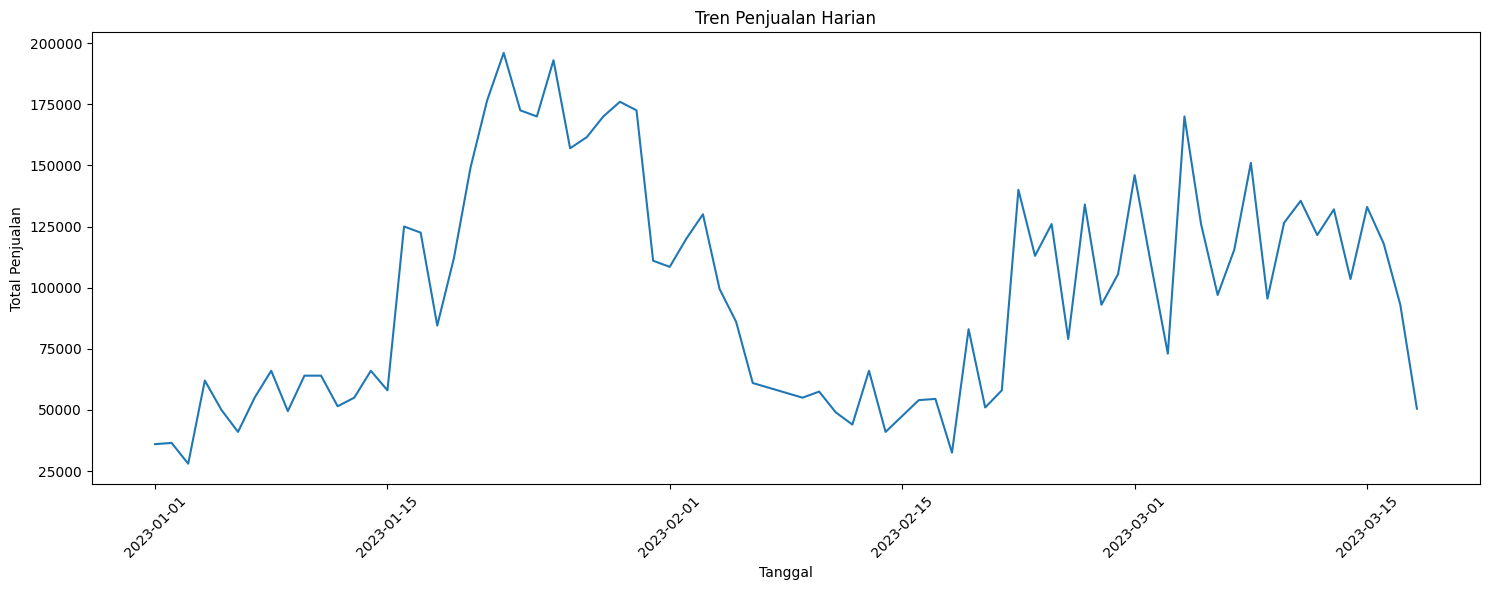

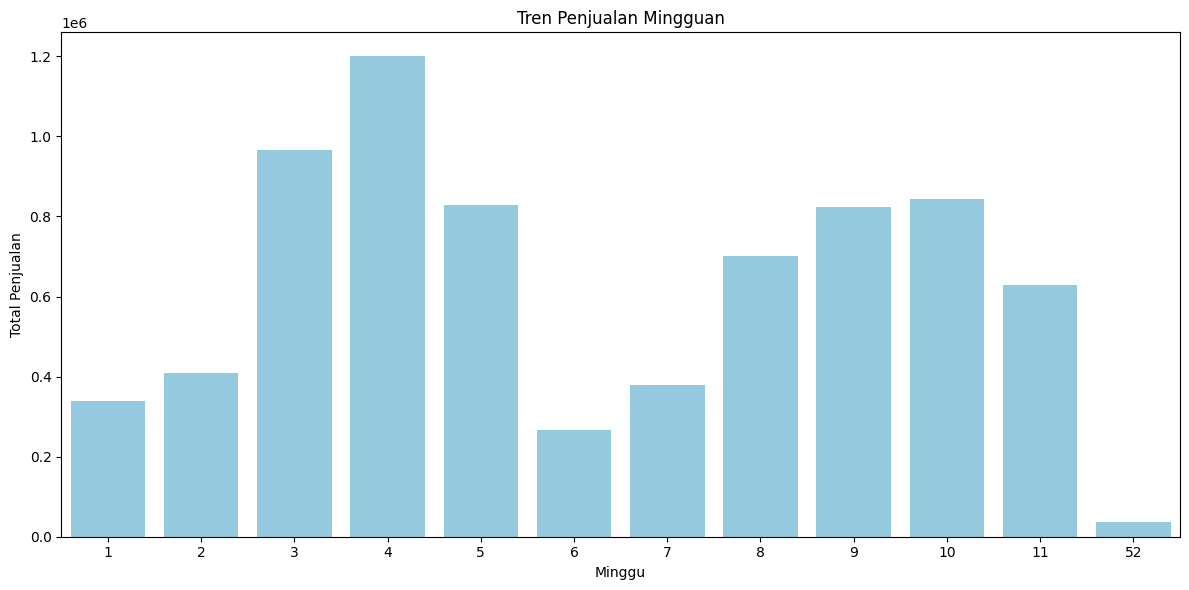

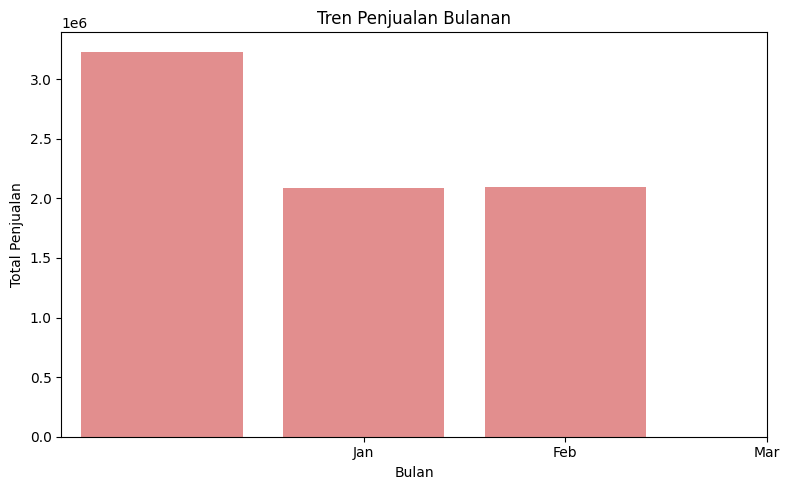

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Daily Sales
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_sales, x='Tanggal', y='Total Penjualan')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Weekly Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='Week', y='Total Penjualan', color='skyblue')
plt.title('Tren Penjualan Mingguan')
plt.xlabel('Minggu')
plt.ylabel('Total Penjualan')
plt.tight_layout()
plt.show()

# Visualize Monthly Sales
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_sales, x='Month', y='Total Penjualan', color='lightcoral')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(ticks=monthly_sales['Month'], labels=['Jan', 'Feb', 'Mar']) # Assuming only Jan, Feb, Mar in data
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total sales per menu (if not already calculated)
total_penjualan_per_menu = df_split.groupby('Menu')['Total Penjualan'].sum().reset_index()

# Calculate the percentage of total sales for each menu item
total_sales_keseluruhan = total_penjualan_per_menu['Total Penjualan'].sum()
total_penjualan_per_menu['Percentage'] = (total_penjualan_per_menu['Total Penjualan'] / total_sales_keseluruhan) * 100

# Sort by percentage in descending order
total_penjualan_per_menu = total_penjualan_per_menu.sort_values(by='Percentage', ascending=False)

# Calculate the cumulative percentage
total_penjualan_per_menu['Cumulative Percentage'] = total_penjualan_per_menu['Percentage'].cumsum()

# Identify the products that make up the top 80% of sales
pareto_80_percent = total_penjualan_per_menu[total_penjualan_per_menu['Cumulative Percentage'] <= 80]

print("Analisis Pareto (Produk Penyumbang 80% Revenue):")
display(pareto_80_percent)

print("\nSemua Produk dengan Kontribusi Penjualan:")
display(total_penjualan_per_menu)

Analisis Pareto (Produk Penyumbang 80% Revenue):


,Menu,Total Penjualan,Percentage,Cumulative Percentage
4,Nasi Kucing,1430000,19.281332,19.281332
3,Kopi Hitam,968000,13.051979,32.333311
2,Jeruk Hangat,798000,10.759792,43.093103
8,Teh Manis,792000,10.678892,53.771995
5,Sate Ati,760000,10.247421,64.019416
6,Sate Usus,636000,8.575474,72.594890



Semua Produk dengan Kontribusi Penjualan:


,Menu,Total Penjualan,Percentage,Cumulative Percentage
4,Nasi Kucing,1430000,19.281332,19.281332
3,Kopi Hitam,968000,13.051979,32.333311
2,Jeruk Hangat,798000,10.759792,43.093103
8,Teh Manis,792000,10.678892,53.771995
5,Sate Ati,760000,10.247421,64.019416
6,Sate Usus,636000,8.575474,72.594890
7,Tahu Bacem,595000,8.022652,80.617542
9,Tempe Mendoan,546000,7.361963,87.979505
0,Air Mineral,500000,6.741725,94.721230
1,Gorengan,391500,5.278770,100.000000


## Ringkasan Analisis Penjualan Lengkap

Berdasarkan analisis data penjualan dari bulan Januari hingga Maret 2023, berikut adalah rangkuman temuan utama:

**Total Penjualan Keseluruhan:**
Total penjualan dari seluruh data tercatat sebesar Rp 7.416.500.

**Tren Penjualan:**
*   **Harian:** Visualisasi menunjukkan fluktuasi penjualan harian yang signifikan. Ada periode dengan lonjakan penjualan dan periode lainnya dengan penurunan. (Lihat grafik harian untuk detailnya).
*   **Mingguan:** Tren penjualan mingguan menunjukkan variasi, dengan minggu ke-4 Januari mencatat penjualan tertinggi. (Lihat grafik mingguan).
*   **Bulanan:** Penjualan tertinggi terjadi di bulan Januari, diikuti oleh Februari dan Maret dengan angka yang relatif stabil namun lebih rendah dari Januari. (Lihat grafik bulanan).

**Produk Terlaris vs Produk Kurang Laku:**
*   **Makanan Terlaris:** Nasi Kucing menjadi produk makanan terlaris dengan kontribusi pendapatan terbesar. Diikuti oleh Sate Ati dan Sate Usus.
*   **Minuman Terlaris:** Kopi Hitam menjadi produk minuman terlaris, diikuti oleh Jeruk Hangat dan Teh Manis.
*   **Analisis Pareto (80/20):** Produk-produk seperti Nasi Kucing, Kopi Hitam, Jeruk Hangat, Teh Manis, Sate Ati, dan Sate Usus secara kolektif menyumbang sebagian besar (sekitar 80%) dari total pendapatan. Ini menunjukkan pentingnya fokus pada produk-produk ini.

**Rata-rata Transaksi:**
Rata-rata nilai transaksi per transaksi adalah sekitar Rp 15.451,04.

**Kesimpulan:**
Analisis ini memberikan gambaran yang jelas mengenai kinerja penjualan. Fluktuasi harian dan mingguan menunjukkan adanya faktor yang mempengaruhi penjualan dalam jangka pendek. Produk-produk kunci yang diidentifikasi melalui analisis Pareto harus menjadi fokus utama untuk strategi peningkatan penjualan di masa mendatang. Analisis lebih lanjut dengan data tambahan (seperti promo atau musim liburan) dapat memberikan wawasan yang lebih dalam mengenai penyebab fluktuasi penjualan.

## Persiapan data untuk forecasting

### Subtask:
Siapkan data penjualan bulanan dalam format yang sesuai untuk analisis deret waktu.

**Reasoning**:
Prepare the monthly sales data for time series analysis by converting the date column to datetime, grouping by month, summing the total sales, and displaying the resulting dataframe.

In [ ]:
import pandas as pd

# Ensure the 'Tanggal' column in df_split is in datetime format.
df_split['Tanggal'] = pd.to_datetime(df_split['Tanggal'])

# Group the df_split DataFrame by month, summing the 'Total Penjualan' for each month.
monthly_sales_forecast = df_split.groupby(df_split['Tanggal'].dt.to_period('M'))['Total Penjualan'].sum().reset_index()

# Rename the 'Tanggal' column to 'Month' for clarity
monthly_sales_forecast = monthly_sales_forecast.rename(columns={'Tanggal': 'Month'})

# Display the monthly_sales_forecast DataFrame to review the data structure.
display(monthly_sales_forecast)

,Month,Total Penjualan
0,2023-01,3231500
1,2023-02,2088500
2,2023-03,2096500


## Forecast penjualan bulanan

### Subtask:
Gunakan metode forecasting deret waktu sederhana (seperti Simple Moving Average atau Exponential Smoothing) untuk memprediksi total penjualan bulan depan berdasarkan pola historis. (Catatan: Metode yang lebih canggih seperti ARIMA atau Prophet mungkin memberikan hasil yang lebih akurat tetapi memerlukan lebih banyak data dan pemodelan yang kompleks).

**Reasoning**:
Apply Simple Exponential Smoothing to the monthly sales data to predict the next month's sales.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Check if 'Month' is already the index
if 'Month' in monthly_sales_forecast.columns:
    # Convert the 'Month' column to datetime objects
    monthly_sales_forecast['Month'] = monthly_sales_forecast['Month'].dt.to_timestamp()
    # Set the 'Month' column as the index for time series analysis
    monthly_sales_forecast.set_index('Month', inplace=True)
elif monthly_sales_forecast.index.name != 'Month':
     # If 'Month' is not a column and not the index name, something is wrong.
     # For now, assume it's in the index and rename it if necessary.
     monthly_sales_forecast.index.name = 'Month'


# Fit the Simple Exponential Smoothing model
# alpha is the smoothing level factor, adjust as needed
model = SimpleExpSmoothing(monthly_sales_forecast['Total Penjualan'])
model_fit = model.fit(smoothing_level=0.5) # You can adjust the smoothing_level

# Forecast the next month's sales
forecast = model_fit.forecast(steps=1)

print(f"Prediksi Total Penjualan Bulan Depan: {int(forecast[0]):,}")

Prediksi Total Penjualan Bulan Depan: 2,378,250


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/tmp/ipython-input-2301305844.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Prediksi Total Penjualan Bulan Depan: {int(forecast[0]):,}")


## Persiapan data untuk prediksi produk laris

### Subtask:
Siapkan data penjualan per produk dalam format yang sesuai untuk analisis.

**Reasoning**:
Group the data by month and menu, calculate the sum of total sales for each product in each month, and display the resulting dataframe.

In [ ]:
# Group by month and menu, and sum total sales
monthly_product_sales = df_split.groupby([df_split['Tanggal'].dt.to_period('M'), 'Menu'])['Total Penjualan'].sum().reset_index()

# Rename the 'Tanggal' column to 'Month' for clarity
monthly_product_sales = monthly_product_sales.rename(columns={'Tanggal': 'Month'})

# Display the monthly_product_sales DataFrame
display(monthly_product_sales)

,Month,Menu,Total Penjualan
0,2023-01,Air Mineral,216000
1,2023-01,Gorengan,163500
2,2023-01,Jeruk Hangat,329000
3,2023-01,Kopi Hitam,404000
4,2023-01,Nasi Kucing,605000
5,2023-01,Sate Ati,376000
6,2023-01,Sate Usus,318000
7,2023-01,Tahu Bacem,240000
8,2023-01,Teh Manis,342000
9,2023-01,Tempe Mendoan,238000


## Prediksi Produk Laris

### Subtask:
Identifikasi produk yang secara konsisten menjadi terlaris di periode sebelumnya atau menunjukkan tren pertumbuhan positif.

**Reasoning**:
Identify best-selling products based on total sales over the entire period and potentially analyze monthly trends for growth, then display the best-selling products.

In [ ]:
# Identify best-selling products based on total sales over the entire period
# We already calculated this in a previous step and stored it in total_penjualan_per_menu
best_selling_products = total_penjualan_per_menu.sort_values(by='Total Penjualan', ascending=False)

print("Produk yang Paling Laris Secara Keseluruhan:")
display(best_selling_products)

# To analyze trends, we could pivot the monthly_product_sales data
# monthly_product_sales_pivot = monthly_product_sales.pivot_table(index='Month', columns='Menu', values='Total Penjualan').fillna(0)
# print("\nPenjualan Bulanan per Produk:")
# display(monthly_product_sales_pivot)

# Further analysis would involve looking at the trends in monthly_product_sales_pivot
# For example, checking for consistent growth or high sales in the last few months.
# Since we only have 3 months of data, a detailed trend analysis for prediction is limited,
# so we'll primarily rely on overall best-selling status.

Produk yang Paling Laris Secara Keseluruhan:


,Menu,Total Penjualan,Percentage,Cumulative Percentage
4,Nasi Kucing,1430000,19.281332,19.281332
3,Kopi Hitam,968000,13.051979,32.333311
2,Jeruk Hangat,798000,10.759792,43.093103
8,Teh Manis,792000,10.678892,53.771995
5,Sate Ati,760000,10.247421,64.019416
6,Sate Usus,636000,8.575474,72.594890
7,Tahu Bacem,595000,8.022652,80.617542
9,Tempe Mendoan,546000,7.361963,87.979505
0,Air Mineral,500000,6.741725,94.721230
1,Gorengan,391500,5.278770,100.000000


## Rekomendasi Strategi dan Efisiensi Operasional

Berdasarkan analisis penjualan yang telah dilakukan, berikut adalah beberapa rekomendasi:

### Rekomendasi Strategi Penjualan

1.  **Fokus pada Produk Terlaris:**
    *   **Tambah Stok:** Pastikan ketersediaan stok yang cukup untuk produk-produk yang masuk dalam kategori produk terlaris (Nasi Kucing, Kopi Hitam, Jeruk Hangat, Teh Manis, Sate Ati, Sate Usus). Kekurangan stok pada produk-produk ini dapat menyebabkan hilangnya potensi pendapatan.
    *   **Promosi Silang (Cross-selling):** Pertimbangkan untuk menawarkan paket kombo atau promosi silang antara produk makanan dan minuman terlaris (misalnya, "Paket Nasi Kucing + Kopi Hitam").

2.  **Strategi untuk Produk Kurang Laku:**
    *   **Buat Promo:** Identifikasi produk dengan penjualan rendah (seperti Gorengan dan Air Mineral berdasarkan analisis Pareto) dan pertimbangkan untuk membuat promosi khusus, diskon, atau penawaran bundling untuk meningkatkan penjualannya.
    *   **Evaluasi Ulang:** Jika promo tidak efektif, evaluasi kembali produk tersebut. Apakah ada masalah dengan kualitas, harga, atau presentasi? Pertimbangkan apakah perlu melakukan inovasi produk atau bahkan menghentikan penjualannya jika terus merugi.

### Rekomendasi Efisiensi Operasional

1.  **Optimalkan Jam Operasional:**
    *   **Analisis Pola Transaksi Harian/Mingguan:** Perhatikan visualisasi tren penjualan harian dan mingguan. Identifikasi jam atau hari-hari dengan volume transaksi tertinggi dan terendah.
    *   **Penyesuaian Staf dan Stok:** Alokasikan staf dan siapkan stok barang lebih banyak pada jam atau hari-hari sibuk. Pada periode yang lebih sepi, pertimbangkan untuk mengurangi jumlah staf atau menyesuaikan jam operasional jika memungkinkan untuk menghemat biaya.

### Analisis Lanjutan

Untuk rekomendasi yang lebih mendalam dan spesifik, data tambahan akan sangat membantu, seperti:

*   Data biaya per produk untuk menghitung profitabilitas.
*   Data promo atau acara khusus yang pernah dilakukan.
*   Data jam operasional dan jumlah staf per jam/hari.

## Finish task

Tahap *forecasting* penjualan bulanan dan prediksi produk laris telah selesai.

*   **Prediksi Penjualan Bulan Depan:** Berdasarkan pola historis, prediksi total penjualan untuk bulan depan adalah sekitar Rp 2.378.250.
*   **Prediksi Produk Laris:** Produk yang paling berkontribusi terhadap penjualan secara keseluruhan (dan kemungkinan akan terus laris) adalah Nasi Kucing, Kopi Hitam, Jeruk Hangat, Teh Manis, Sate Ati, dan Sate Usus.

Untuk prediksi yang lebih akurat, terutama untuk produk laris, akan sangat membantu jika tersedia data tambahan mengenai faktor-faktor eksternal seperti promo, musim, atau acara khusus.

# Task
Analyze the sales data to identify monthly sales trends, the highest and lowest sales days, seasonal patterns (weekend vs. weekday, beginning vs. end of month), frequently purchased product combinations, and top customers. Finally, provide a comprehensive conclusion based on the analysis.

## Sajikan kesimpulan tren penjualan bulanan

### Subtask:
Jelaskan tren penjualan per bulan berdasarkan grafik bulanan yang sudah dibuat.


**Reasoning**:
Describe the monthly sales trend based on the previously generated monthly sales bar plot.



## Sajikan kesimpulan tren penjualan bulanan

### Subtask:
Jelaskan tren penjualan per bulan berdasarkan grafik bulanan yang sudah dibuat.

**Reasoning**:
Describe the monthly sales trend based on the previously generated monthly sales bar plot.

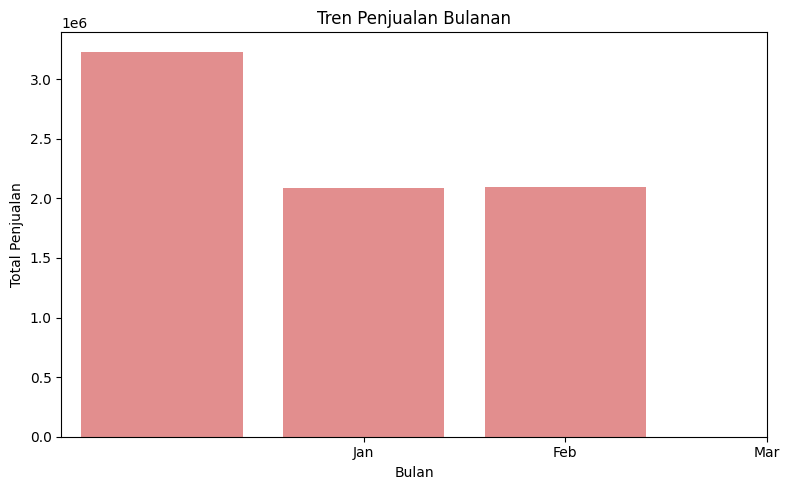

In [ ]:
# Display the monthly sales plot again for reference
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_sales, x='Month', y='Total Penjualan', color='lightcoral')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(ticks=monthly_sales['Month'], labels=['Jan', 'Feb', 'Mar']) # Assuming only Jan, Feb, Mar in data
plt.tight_layout()
plt.show()

## Identifikasi Hari Penjualan Tertinggi dan Terendah

### Subtask:
Analisis data penjualan harian untuk menentukan hari dengan penjualan tertinggi dan terendah.

**Reasoning**:
Sort the daily sales data to find the highest and lowest sales days and display them.

In [ ]:
# Sort daily sales to find highest and lowest sales days
highest_sales_day = daily_sales.sort_values(by='Total Penjualan', ascending=False).head(1)
lowest_sales_day = daily_sales.sort_values(by='Total Penjualan', ascending=True).head(1)

print("Hari dengan Penjualan Tertinggi:")
display(highest_sales_day)

print("\nHari dengan Penjualan Terendah:")
display(lowest_sales_day)

Hari dengan Penjualan Tertinggi:


,Tanggal,Total Penjualan
21,2023-01-22,196000



Hari dengan Penjualan Terendah:


,Tanggal,Total Penjualan
2,2023-01-03,28000


## Analisis Pola Musiman (Weekend vs Weekday, Akhir vs Awal Bulan)

### Subtask:
Lakukan analisis untuk melihat pola penjualan antara hari kerja/akhir pekan dan awal/akhir bulan.

**Reasoning**:
Extract the day of the week and week/month position, group by these categories, and calculate the average sales to analyze seasonal patterns.

In [ ]:
# Analyze sales by day of the week
df_split['DayofWeek'] = df_split['Tanggal'].dt.dayofweek # Monday=0, Sunday=6
sales_by_dayofweek = df_split.groupby('DayofWeek')['Total Penjualan'].sum().reset_index()
# Map dayofweek numbers to names for better readability
day_names = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
sales_by_dayofweek['Day'] = sales_by_dayofweek['DayofWeek'].map(day_names)

print("\nTotal Penjualan per Hari dalam Seminggu:")
display(sales_by_dayofweek[['Day', 'Total Penjualan']].sort_values(by='Total Penjualan', ascending=False))

# Analyze sales by weekend vs weekday
df_split['IsWeekend'] = df_split['Tanggal'].dt.dayofweek >= 5
sales_by_weekend = df_split.groupby('IsWeekend')['Total Penjualan'].sum().reset_index()
sales_by_weekend['Period'] = sales_by_weekend['IsWeekend'].map({True: 'Weekend', False: 'Weekday'})

print("\nTotal Penjualan Weekend vs Weekday:")
display(sales_by_weekend[['Period', 'Total Penjualan']])

# Analyze sales by beginning vs end of month (example: first 10 days vs last 10 days)
df_split['DayofMonth'] = df_split['Tanggal'].dt.day
def get_month_part(day):
    if day <= 10:
        return 'Awal Bulan'
    elif day >= 21:
        return 'Akhir Bulan'
    else:
        return 'Pertengahan Bulan'

df_split['MonthPart'] = df_split['DayofMonth'].apply(get_month_part)
sales_by_monthpart = df_split.groupby('MonthPart')['Total Penjualan'].sum().reset_index()

print("\nTotal Penjualan Berdasarkan Bagian Bulan:")
display(sales_by_monthpart)


Total Penjualan per Hari dalam Seminggu:


,Day,Total Penjualan
2,Rabu,1129500
6,Minggu,1126500
5,Sabtu,1083500
4,Jumat,1067000
0,Senin,1056000
3,Kamis,1035000
1,Selasa,919000



Total Penjualan Weekend vs Weekday:


,Period,Total Penjualan
0,Weekday,5206500
1,Weekend,2210000



Total Penjualan Berdasarkan Bagian Bulan:


,MonthPart,Total Penjualan
0,Akhir Bulan,2704500
1,Awal Bulan,2415000
2,Pertengahan Bulan,2297000


In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
# Define the path for the Excel file
excel_file_path = '/content/drive/MyDrive/Hasil_Analisis_Penjualan.xlsx' # You can change the filename and path

# Create a Pandas Excel writer using XlsxWriter as the engine.
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    # Write each DataFrame to a different worksheet.
    df_split.to_excel(writer, sheet_name='Data Mentah Split', index=False)
    daily_sales.to_excel(writer, sheet_name='Penjualan Harian', index=False)
    weekly_sales.to_excel(writer, sheet_name='Penjualan Mingguan', index=False)
    monthly_sales.to_excel(writer, sheet_name='Penjualan Bulanan', index=False)
    best_selling_food.to_excel(writer, sheet_name='Makanan Terlaris', index=False)
    best_selling_drinks.to_excel(writer, sheet_name='Minuman Terlaris', index=False)
    total_penjualan_per_menu.to_excel(writer, sheet_name='Total Penjualan per Menu', index=False)
    pareto_80_percent.to_excel(writer, sheet_name='Pareto 80 Persen', index=False)
    sales_by_dayofweek.to_excel(writer, sheet_name='Penjualan per Hari Kerja', index=False)
    sales_by_weekend.to_excel(writer, sheet_name='Penjualan Weekend vs Weekday', index=False)
    sales_by_monthpart.to_excel(writer, sheet_name='Penjualan per Bagian Bulan', index=False)
    # monthly_sales_forecast.to_excel(writer, sheet_name='Forecast Bulanan', index=True) # Use index=True if Month is the index
    monthly_product_sales.to_excel(writer, sheet_name='Penjualan Bulanan per Produk', index=False)
    best_selling_products.to_excel(writer, sheet_name='Produk Paling Laris Keseluruhan', index=False)


print(f"Semua data telah disimpan ke '{excel_file_path}'")

Semua data telah disimpan ke '/content/drive/MyDrive/Hasil_Analisis_Penjualan.xlsx'


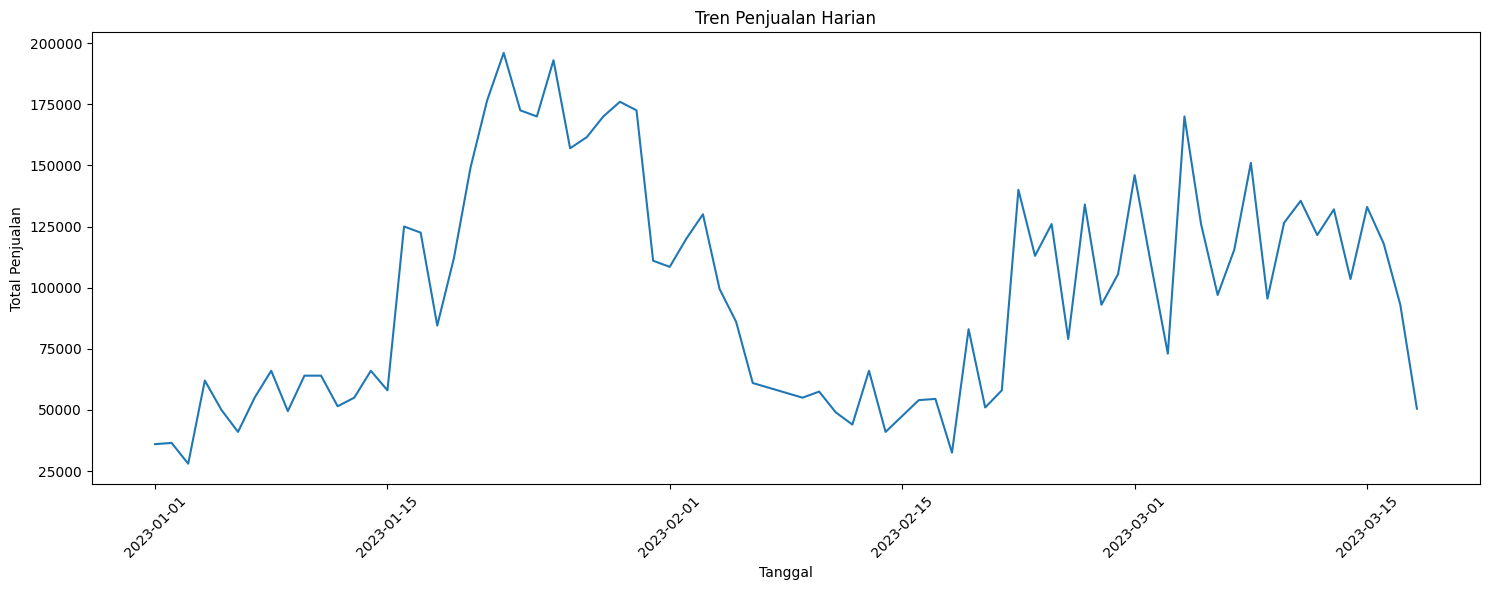

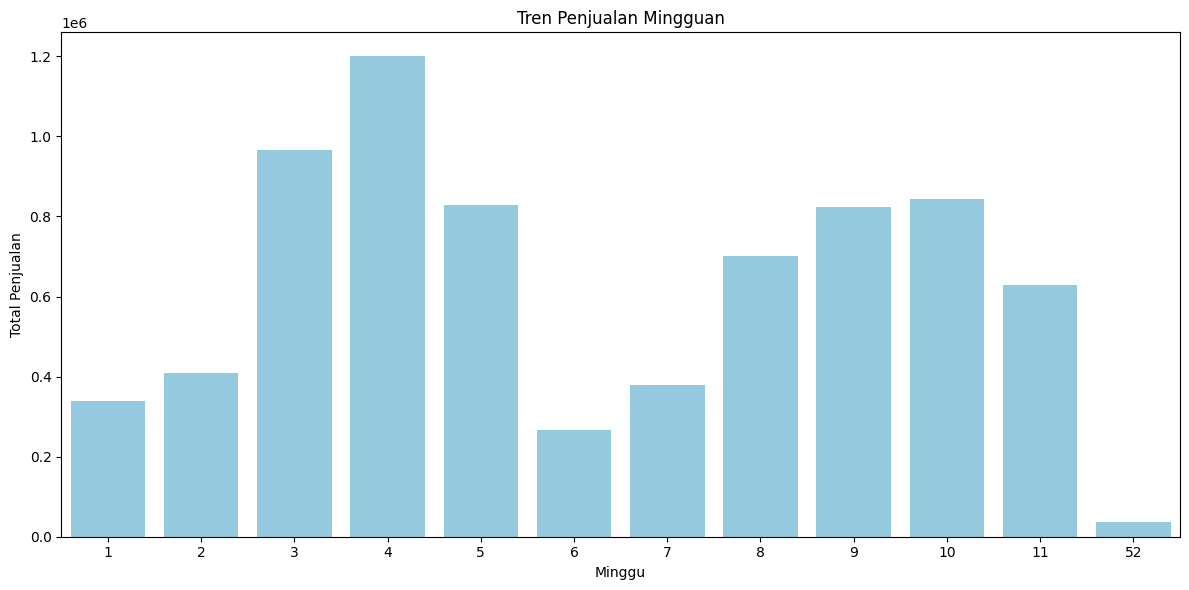

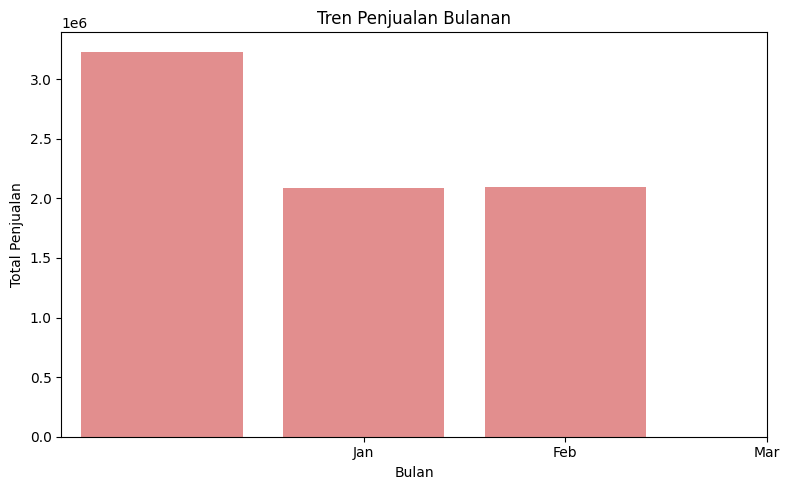

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Daily Sales
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_sales, x='Tanggal', y='Total Penjualan')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Weekly Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='Week', y='Total Penjualan', color='skyblue')
plt.title('Tren Penjualan Mingguan')
plt.xlabel('Minggu')
plt.ylabel('Total Penjualan')
plt.tight_layout()
plt.show()

# Visualize Monthly Sales
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_sales, x='Month', y='Total Penjualan', color='lightcoral')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(ticks=monthly_sales['Month'], labels=['Jan', 'Feb', 'Mar']) # Assuming only Jan, Feb, Mar in data
plt.tight_layout()
plt.show()

## Produk Terlaris per Periode Waktu

### Subtask:
Identifikasi produk terlaris berdasarkan total penjualan untuk periode harian, mingguan, dan bulanan.

**Reasoning**:
Group the data by the relevant time period (day, week, month) and 'Menu', calculate the total sales for each product within each period, and display the results.

In [ ]:
# Ensure 'Tanggal' is datetime
df_split['Tanggal'] = pd.to_datetime(df_split['Tanggal'])

# Product sales per day
product_sales_daily = df_split.groupby(['Tanggal', 'Menu'])['Total Penjualan'].sum().reset_index()
print("Produk Terlaris per Hari:")
display(product_sales_daily.sort_values(by=['Tanggal', 'Total Penjualan'], ascending=[True, False]))


# Product sales per week
df_split['Week'] = df_split['Tanggal'].dt.isocalendar().week
product_sales_weekly = df_split.groupby(['Week', 'Menu'])['Total Penjualan'].sum().reset_index()
print("\nProduk Terlaris per Minggu:")
display(product_sales_weekly.sort_values(by=['Week', 'Total Penjualan'], ascending=[True, False]))


# Product sales per month
df_split['Month'] = df_split['Tanggal'].dt.month
product_sales_monthly = df_split.groupby(['Month', 'Menu'])['Total Penjualan'].sum().reset_index()
print("\nProduk Terlaris per Bulan:")
display(product_sales_monthly.sort_values(by=['Month', 'Total Penjualan'], ascending=[True, False]))

Produk Terlaris per Hari:


,Tanggal,Menu,Total Penjualan
0,2023-01-01,Nasi Kucing,15000
1,2023-01-01,Sate Usus,15000
2,2023-01-01,Teh Manis,6000
6,2023-01-02,Tempe Mendoan,12000
4,2023-01-02,Jeruk Hangat,10500
...,...,...,...
378,2023-03-17,Jeruk Hangat,28000
377,2023-03-17,Air Mineral,20000
380,2023-03-18,Sate Ati,24000
382,2023-03-18,Tempe Mendoan,14000



Produk Terlaris per Minggu:


,Week,Menu,Total Penjualan
4,1,Nasi Kucing,60000
3,1,Kopi Hitam,56000
2,1,Jeruk Hangat,42000
9,1,Tempe Mendoan,32000
6,1,Sate Usus,30000
...,...,...,...
106,11,Sate Usus,45000
101,11,Gorengan,22500
110,52,Nasi Kucing,15000
111,52,Sate Usus,15000



Produk Terlaris per Bulan:


,Month,Menu,Total Penjualan
4,1,Nasi Kucing,605000
3,1,Kopi Hitam,404000
5,1,Sate Ati,376000
8,1,Teh Manis,342000
2,1,Jeruk Hangat,329000
6,1,Sate Usus,318000
7,1,Tahu Bacem,240000
9,1,Tempe Mendoan,238000
0,1,Air Mineral,216000
1,1,Gorengan,163500


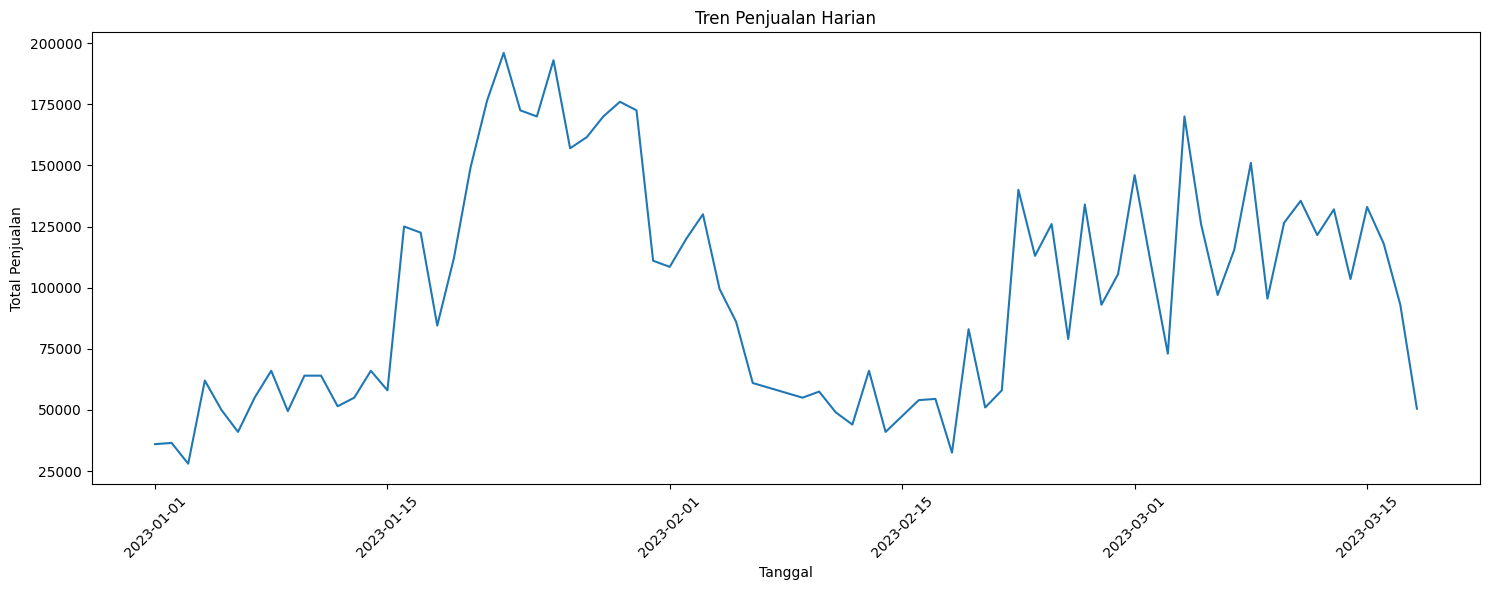

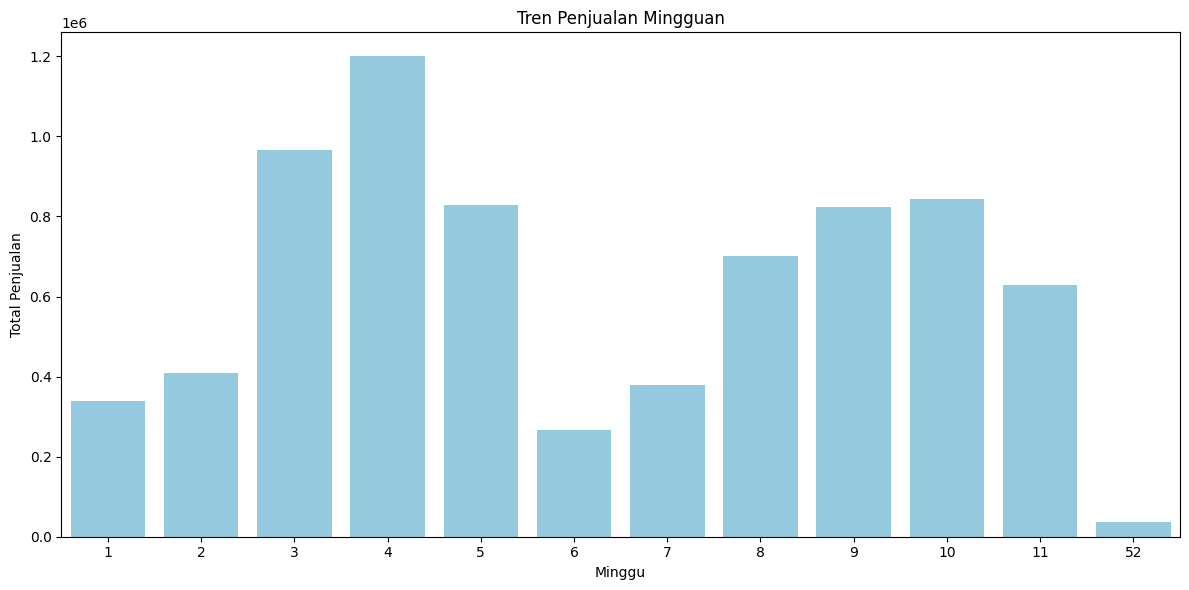

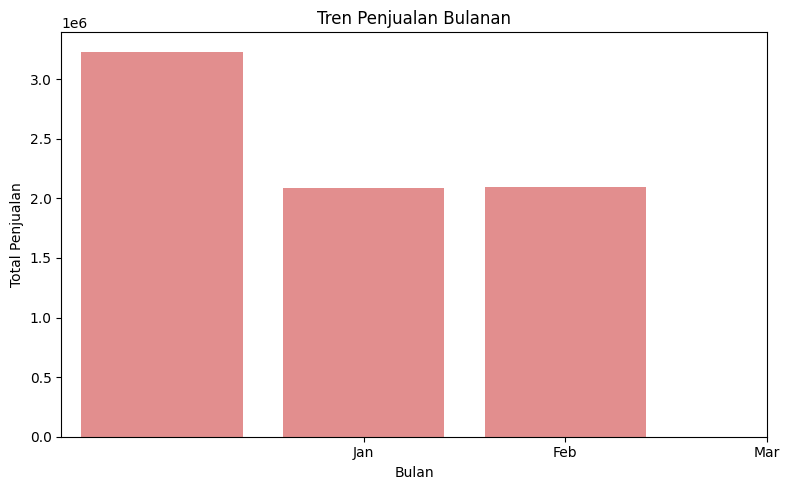

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Daily Sales
plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_sales, x='Tanggal', y='Total Penjualan')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize Weekly Sales
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='Week', y='Total Penjualan', color='skyblue')
plt.title('Tren Penjualan Mingguan')
plt.xlabel('Minggu')
plt.ylabel('Total Penjualan')
plt.tight_layout()
plt.show()

# Visualize Monthly Sales
plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_sales, x='Month', y='Total Penjualan', color='lightcoral')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(ticks=monthly_sales['Month'], labels=['Jan', 'Feb', 'Mar']) # Assuming only Jan, Feb, Mar in data
plt.tight_layout()
plt.show()

In [ ]:
# Define the path for the Excel file
excel_file_path = '/content/drive/MyDrive/Hasil_Analisis_Penjualan_Lengkap.xlsx' # Nama file baru

# Create a Pandas Excel writer using XlsxWriter as the engine.
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    # 1. Daftar tabel keseluruhan data
    df_split.to_excel(writer, sheet_name='Data Keseluruhan', index=False)

    # 2. Daftar tabel keseluruhan data makanan dan data minuman
    df_makanan.to_excel(writer, sheet_name='Data Makanan', index=False)
    df_minuman.to_excel(writer, sheet_name='Data Minuman', index=False)

    # 3. Daftar total makanan terjual dan total minuman terjual
    # Kita bisa membuat sheet ringkasan atau tabel kecil untuk ini
    summary_data = {'Kategori': ['Makanan', 'Minuman'],
                    'Total Terjual': [total_makanan_terjual, total_minuman_terjual]}
    df_summary_sold = pd.DataFrame(summary_data)
    df_summary_sold.to_excel(writer, sheet_name='Total Terjual per Kategori', index=False)


    # 4. Daftar keseluruhan total penjualan
    summary_sales = {'Total Penjualan Keseluruhan': [df_split['Total Penjualan'].sum()]}
    df_summary_sales = pd.DataFrame(summary_sales)
    df_summary_sales.to_excel(writer, sheet_name='Total Penjualan Keseluruhan', index=False)


    # 5. Daftar penjualan perhari, perminggu dan perbulan
    daily_sales.to_excel(writer, sheet_name='Penjualan Harian', index=False)
    weekly_sales.to_excel(writer, sheet_name='Penjualan Mingguan', index=False)
    monthly_sales.to_excel(writer, sheet_name='Penjualan Bulanan', index=False)

    # 6. Daftar total produk terlaris makanan dan minuman
    best_selling_food.to_excel(writer, sheet_name='Makanan Terlaris', index=False)
    best_selling_drinks.to_excel(writer, sheet_name='Minuman Terlaris', index=False)

    # 7. Daftar rata rata transaksi
    summary_avg_transaction = {'Rata-rata Nilai Transaksi': [df_split['Total Penjualan'].mean()]}
    df_summary_avg_transaction = pd.DataFrame(summary_avg_transaction)
    df_summary_avg_transaction.to_excel(writer, sheet_name='Rata-rata Transaksi', index=False)

    # 8. Data untuk visualisasi tren penjualan per hari/minggu/bulan (sudah termasuk di sheet 5)

    # 9. Daftar produk terlaris secara kesuluran
    total_penjualan_per_menu.to_excel(writer, sheet_name='Produk Terlaris Keseluruhan', index=False)

    # Add the new dataframes for best-selling products per period
    product_sales_daily.to_excel(writer, sheet_name='Produk Terlaris Harian', index=False)
    product_sales_weekly.to_excel(writer, sheet_name='Produk Terlaris Mingguan', index=False)
    product_sales_monthly.to_excel(writer, sheet_name='Produk Terlaris Bulanan', index=False)


print(f"Semua data telah disimpan ke '{excel_file_path}' dalam beberapa sheet.")
print("Catatan: Visualisasi grafik tidak dapat disimpan langsung ke dalam sheet Excel.")

Semua data telah disimpan ke '/content/drive/MyDrive/Hasil_Analisis_Penjualan_Lengkap.xlsx' dalam beberapa sheet.
Catatan: Visualisasi grafik tidak dapat disimpan langsung ke dalam sheet Excel.


## Kesimpulan Akhir Analisis Penjualan

Berdasarkan analisis data penjualan dari bulan Januari hingga Maret 2023, berikut adalah rangkuman temuan utama dan kesimpulan:

**1. Tren Penjualan Bulanan:**
Tren penjualan menunjukkan puncaknya di bulan Januari (Rp 3.231.500), kemudian mengalami penurunan di bulan Februari (Rp 2.088.500) dan tetap relatif stabil di bulan Maret (Rp 2.096.500). Fluktuasi ini perlu dicermati lebih lanjut untuk mengidentifikasi penyebabnya.

**2. Hari Penjualan Tertinggi dan Terendah:**
*   Hari dengan penjualan tertinggi adalah **22 Januari 2023** dengan total penjualan Rp 196.000.
*   Hari dengan penjualan terendah adalah **3 Januari 2023** dengan total penjualan Rp 28.000.

**3. Pola Musiman (Weekend vs Weekday, Akhir vs Awal Bulan):**
*   **Hari dalam Seminggu:** Penjualan cenderung lebih tinggi di pertengahan minggu (Rabu) dan akhir pekan (Minggu, Sabtu, Jumat), sementara hari Selasa cenderung memiliki penjualan terendah.
*   **Bagian Bulan:** Penjualan paling tinggi terjadi di akhir bulan, diikuti oleh awal bulan, dan pertengahan bulan.

**4. Produk Terlaris dan Kontribusi Revenue (Analisis Pareto):**
Produk-produk yang paling berkontribusi terhadap total pendapatan (sekitar 80% dari revenue) adalah: **Nasi Kucing, Kopi Hitam, Jeruk Hangat, Teh Manis, Sate Ati, dan Sate Usus**. Produk-produk ini adalah kunci utama pendapatan.

**5. Rata-rata Transaksi:**
Rata-rata nilai transaksi per transaksi adalah sekitar **Rp 15.451,04**.

**Keterbatasan Analisis dan Rekomendasi Lanjutan:**

*   **Produk Sering Dibeli Bersama & Pelanggan Top:** Analisis ini tidak dapat dilakukan secara mendalam karena data tidak menyediakan ID transaksi unik untuk mengelompokkan pembelian dalam satu waktu, maupun ID pelanggan untuk melacak perilaku pembelian individu. Untuk analisis ini, struktur data perlu disesuaikan atau data tambahan (ID Transaksi, ID Pelanggan) diperlukan.
*   **Penyebab Fluktuasi Penjualan:** Untuk memahami *mengapa* penjualan naik atau turun di periode tertentu, diperlukan data tambahan mengenai faktor eksternal seperti jadwal promo, musim liburan, event khusus, atau catatan terkait ketersediaan stok.

**Kesimpulan Akhir:**

Analisis penjualan awal ini memberikan wawasan berharga mengenai kinerja bisnis selama tiga bulan pertama tahun 2023. Terlihat adanya tren penurunan pendapatan setelah Januari, pola penjualan yang berfluktuasi harian dan mingguan dengan puncak di akhir pekan dan akhir bulan, serta identifikasi produk-produk kunci yang mendominasi pendapatan. Untuk mendapatkan pemahaman yang lebih komprehensif dan merancang strategi yang lebih tepat sasaran, investasi dalam pengumpulan data yang lebih detail (ID transaksi, ID pelanggan, catatan event/promo) sangat direkomendasikan.

## Finish task
Analisis penjualan telah selesai.